In [2]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 330.3 kB/s eta 0:00:30
   ---------------------------------------- 0.0/9.9 MB 495.5 kB/s eta 0:00:20
   ---------------------------------------- 0.1/9.9 MB 1.0 MB/s eta 0:00:10
   - -------------------------------------- 0.3/9.9 MB 1.6 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/9.9 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/9.9 MB 4.1 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/9.9 MB 5.5 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/9.9 MB 6.1 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/9.9 MB 6.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/9.9 MB 6.2 MB/s eta 0:00:02
   ----------- ---------------------------- 2.8/9.9 MB 6.5 MB/s eta 0:00:02
   -------------- ------------------------- 3.5/9.9 MB 7.4 MB/s eta 0:00:01
   ------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


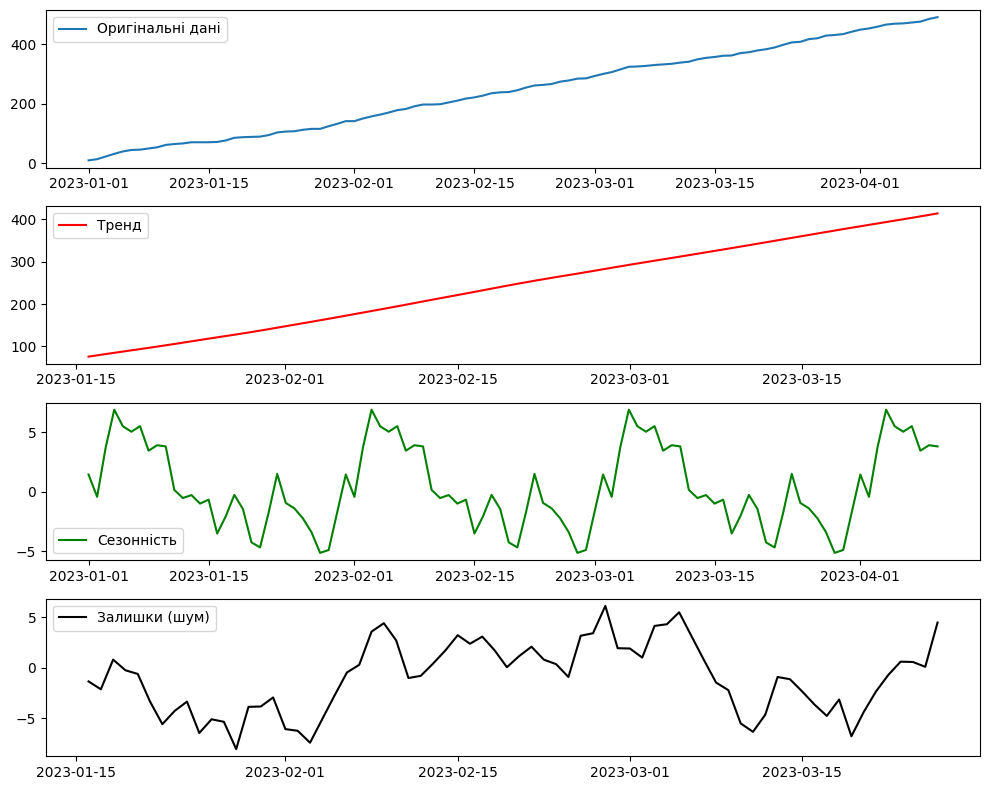

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

# --- 1. Декомпозиція часових рядів ---
decomposition = seasonal_decompose(df["num_casualties"], model="additive", period=30)

# Візуалізація компонентів
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df["num_casualties"], label="Оригінальні дані")
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label="Тренд", color="red")
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label="Сезонність", color="green")
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label="Залишки (шум)", color="black")
plt.legend()

plt.tight_layout()
plt.show()

                               SARIMAX Results                                
Dep. Variable:         num_casualties   No. Observations:                  100
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -242.659
Date:                Fri, 14 Mar 2025   AIC                            495.317
Time:                        09:50:41   BIC                            508.293
Sample:                    01-01-2023   HQIC                           500.567
                         - 04-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0231      0.029      0.796      0.426      -0.034       0.080
ar.L2          0.9769      0.029     33.645      0.000       0.920       1.034
ma.L1          0.0028      0.631      0.004      0.9

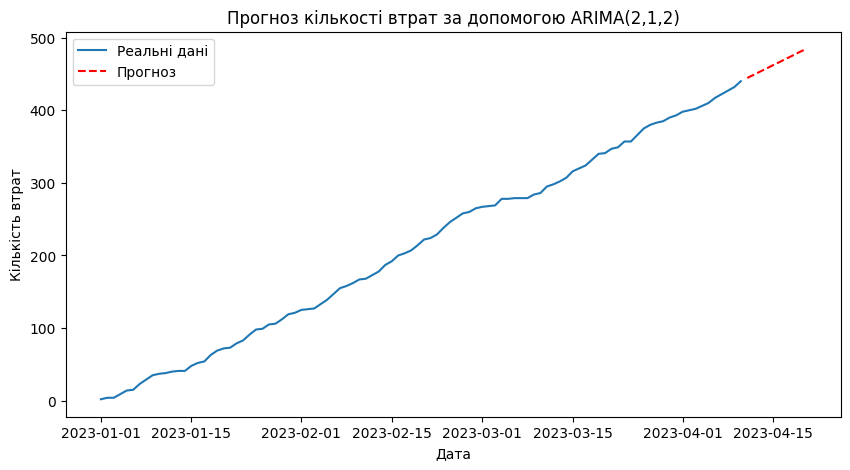

In [5]:

# Генерація випадкових даних (часовий ряд кількості втрат)
date_rng = pd.date_range(start="2023-01-01", periods=100, freq="D")  # 100 днів
data = {"num_casualties": np.cumsum(np.random.randint(0, 10, size=100))}  # Сума випадкових значень
df = pd.DataFrame(data, index=date_rng)
df.index.name = "date"

# Побудова ARIMA(2,1,2)
model = ARIMA(df["num_casualties"], order=(2, 1, 2))
model_fit = model.fit()

# Вивід характеристик моделі
print(model_fit.summary())

# Прогноз на 10 днів
forecast = model_fit.forecast(steps=10)

# Візуалізація реальних та прогнозованих даних
plt.figure(figsize=(10,5))
plt.plot(df.index, df["num_casualties"], label="Реальні дані")
plt.plot(pd.date_range(df.index[-1], periods=11, freq="D")[1:], forecast, 
         label="Прогноз", linestyle="dashed", color="red")
plt.legend()
plt.title("Прогноз кількості втрат за допомогою ARIMA(2,1,2)")
plt.xlabel("Дата")
plt.ylabel("Кількість втрат")
plt.show()


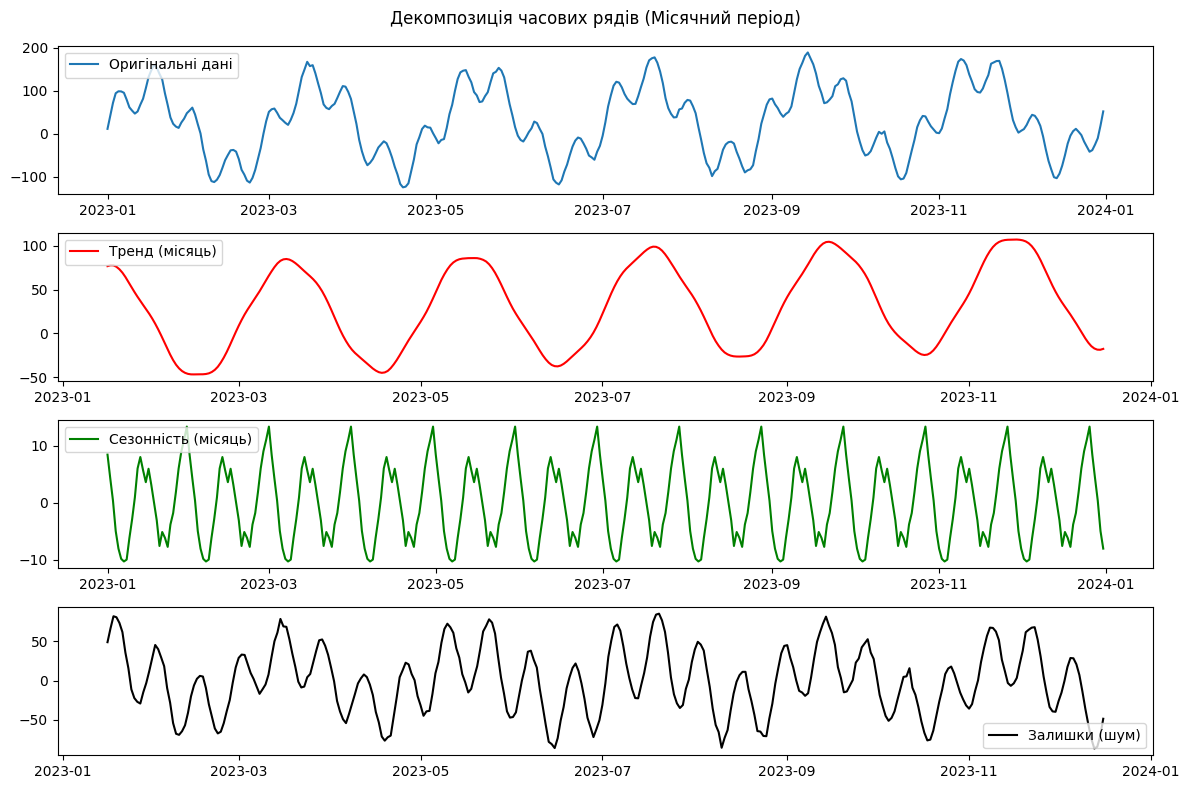

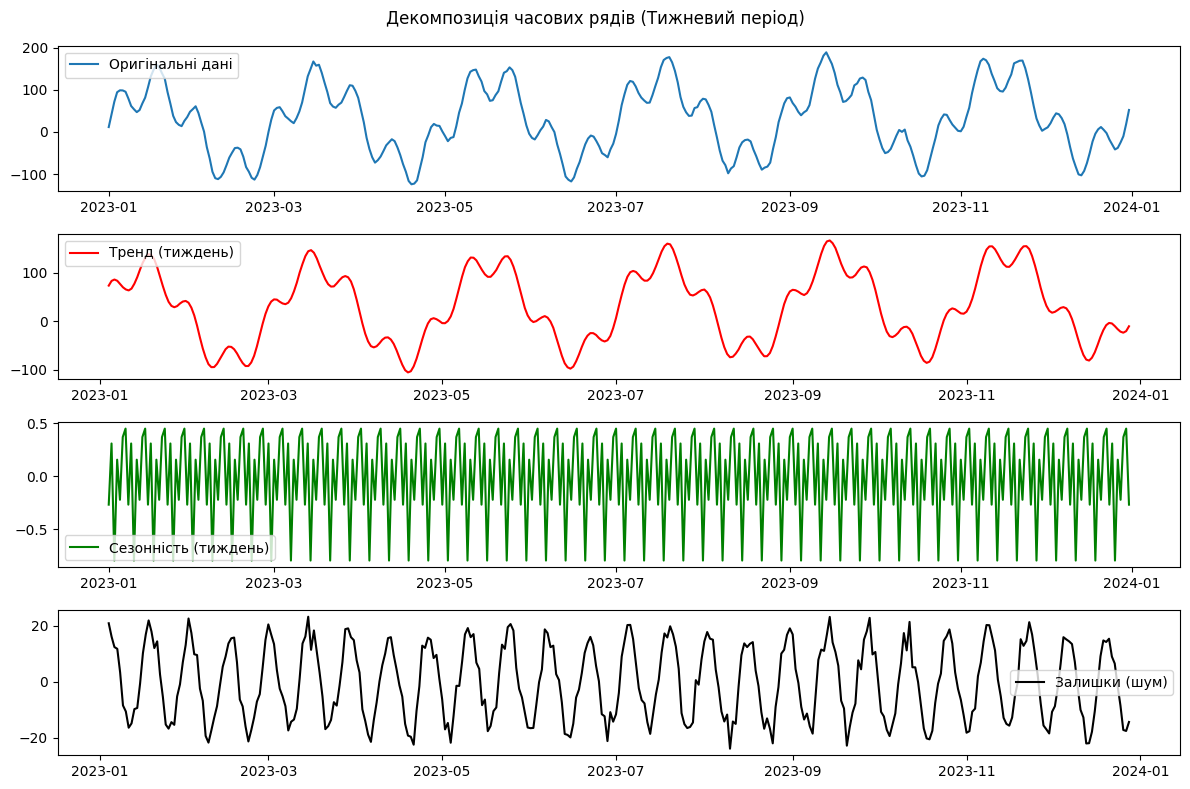

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# --- 1. Генерація даних ---
date_rng = pd.date_range(start="2023-01-01", periods=365, freq="D")  # 1 рік даних
np.random.seed(42)
trend = np.linspace(10, 50, 365)  # Лінійний тренд
seasonality_month = 100 * np.sin(np.linspace(0, 12 * np.pi, 365))  # Місячна сезонність
seasonality_week = 50 * np.sin(np.linspace(0, 52 * np.pi, 365))  # Тижнева сезонність
noise = np.random.normal(0, 3, 365)  # Шум
data = trend + seasonality_month + seasonality_week + noise  # Підсумковий часовий ряд

df = pd.DataFrame({"num_casualties": data}, index=date_rng)
df.index.name = "date"

# --- 2. Декомпозиція за місяцями ---
decomposition_month = seasonal_decompose(df["num_casualties"], model="additive", period=30)

# --- 3. Декомпозиція за тижнями ---
decomposition_week = seasonal_decompose(df["num_casualties"], model="additive", period=7)

# --- 4. Візуалізація місячної декомпозиції ---
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df["num_casualties"], label="Оригінальні дані")
plt.legend()

plt.subplot(412)
plt.plot(decomposition_month.trend, label="Тренд (місяць)", color="red")
plt.legend()

plt.subplot(413)
plt.plot(decomposition_month.seasonal, label="Сезонність (місяць)", color="green")
plt.legend()

plt.subplot(414)
plt.plot(decomposition_month.resid, label="Залишки (шум)", color="black")
plt.legend()

plt.suptitle("Декомпозиція часових рядів (Місячний період)")
plt.tight_layout()
plt.show()

# --- 5. Візуалізація тижневої декомпозиції ---
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df["num_casualties"], label="Оригінальні дані")
plt.legend()

plt.subplot(412)
plt.plot(decomposition_week.trend, label="Тренд (тиждень)", color="red")
plt.legend()

plt.subplot(413)
plt.plot(decomposition_week.seasonal, label="Сезонність (тиждень)", color="green")
plt.legend()

plt.subplot(414)
plt.plot(decomposition_week.resid, label="Залишки (шум)", color="black")
plt.legend()

plt.suptitle("Декомпозиція часових рядів (Тижневий період)")
plt.tight_layout()
plt.show()
